# Data anonymisation of all things that need to be anonymised
- Name - sampleID; Ogi (remove first and last name)
- gender - leave it for both
- birth date - birth year banding; LS
- country_of_birth - continent; LS
- current country - leave it
- phone number - remove
- postcode - area; Asude
- national_insurance_number - remove
- bank_account_number - remove
- weight - band into range; Asude (leave it for researchers)
- height - band into range; Asude (leave it for researchers)
- blood group - keep for researcher, remove for signs for public
- avg_n_drinks_per_week - keep for researchers, band for public
- avg_n_cigret_per_week - keep for researchers, band for public
- education_level - leave it for researchers, band for public
- n_countries_visited - band; Ogi

## Setting up

In [86]:
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import pycountry_convert as pc

In [87]:
data = pd.read_csv('customer_information.csv')
data.head(10)

,given_name,surname,gender,birthdate,country_of_birth,current_country,phone_number,postcode,national_insurance_number,bank_account_number,cc_status,weight,height,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited
0,Lorraine,Reed,F,05/07/1984,Armenia,United Kingdom,(07700) 900876,LS5 8FN,ZZ 19 48 92 T,51157818,0,74.2,1.73,B+,6.5,218.8,phD,48
1,Edward,Williams,M,17/06/1997,Northern Mariana Islands,United Kingdom,(07700) 900 877,M0U 1RA,ZZ 753513 T,103328715,0,69.4,1.74,O-,0.7,43.6,primary,42
2,Hannah,Turner,F,15/06/1990,Venezuela,United Kingdom,+447700 900148,SO1 8HZ,ZZ 947196 T,69342327,0,98.6,1.88,B+,7.8,59.1,bachelor,9
3,Christine,Osborne,F,29/07/2000,Eritrea,United Kingdom,+447700 900112,B18 8LW,ZZ 39 69 47 T,85159170,0,62.0,1.56,O+,4.6,284.2,primary,32
4,Francesca,Yates,F,04/11/1968,Ecuador,United Kingdom,07700 900 413,TQ2 6BE,ZZ 30 98 91 T,11399166,0,96.3,1.81,A-,4.4,348.8,secondary,34
5,Joanne,Middleton,F,15/10/1963,Argentina,United Kingdom,+44(0)7700 900 032,CM7H 0XS,ZZ 141314 T,66208707,0,43.4,1.59,A-,5.7,219.3,other,7
6,Joel,Spencer,M,08/07/1982,Cook Islands,United Kingdom,(07700) 900579,L02 5WL,ZZ 97 20 76 T,108456420,0,77.5,1.55,B+,2.4,79.5,secondary,34
7,Leonard,Marshall,M,20/01/1987,Saint Vincent and the Grenadines,United Kingdom,07700 900508,CR3 5ZN,ZZ 599246 T,126109351,0,59.0,1.89,A+,8.4,48.0,other,24
8,Tracy,Smith,F,07/04/1999,Kiribati,United Kingdom,+447700 900 960,WR96 2TD,ZZ278789T,10754702,0,83.1,1.42,A+,1.2,148.1,secondary,17
9,Gavin,Kay,M,21/12/1998,Belize,United Kingdom,+44(0)7700900206,KT5A 0AW,ZZ 131934 T,52176102,0,80.0,1.74,A+,5.2,47.0,bachelor,47


## Name - sampleID

In [89]:
def generate_sample_id(index):
    return f"sid_{str(index + 1).zfill(5)}"

data['id'] = data.index.to_series().apply(generate_sample_id)

## Birthdate - Birth year

In [88]:
# Birth years
birthDate = pd.to_datetime(data.birthdate, format='mixed')
data['birth_year'] = pd.DatetimeIndex(birthDate).year
data.head(10)

# finding number of unique values per band
unique_birthdate_counts = data['birth_year'].value_counts()
unique_birthdate_counts
# potential problem: only 5 1955

birth_year
1980    30
1957    28
1961    27
1962    27
1981    27
1983    26
1996    26
1978    26
1998    25
1963    25
1977    25
1994    25
1956    25
1989    25
1968    24
1971    24
1960    24
1997    22
1990    22
1958    21
1988    21
1967    21
1993    20
2002    20
1972    20
1964    20
1976    20
1973    20
1995    20
1986    19
1979    19
2001    19
1959    19
1975    18
1985    18
1987    18
1974    18
1970    18
1982    17
2003    16
2000    16
1992    15
1966    15
1969    15
1999    13
1984    12
1965    12
1991    12
1955     5
Name: count, dtype: int64

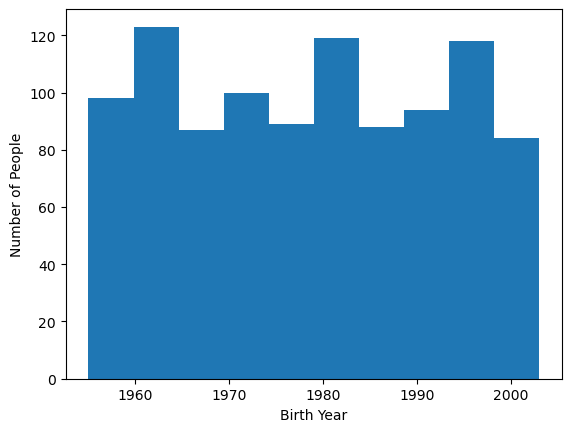

In [69]:
plt.hist(data["birth_year"])
plt.xlabel("Birth Year")
plt.ylabel("Number of People")
plt.show()

## Country of birth - continent

In [101]:
continent_mapping = {
    'Korea': 'Asia',
    'Western Sahara': 'Africa',
    'Slovakia (Slovak Republic)': 'Europe',
    'Saint Barthelemy': 'North America',
    'Pitcairn Islands': 'Oceania',
    'Holy See': 'Europe',
    'Reunion': 'Africa',
    'United States Minor Outlying Islands': 'North America',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'Saint Helena': 'Africa',
    "Cote d'Ivoire": 'Africa',
    'British Indian Ocean Territory (Chagos Archipelago)': 'Asia',
    'Palestinian Territory': 'Asia',
    'Libyan Arab Jamahiriya': 'Africa',
    'Timor-Leste': 'Asia',
    'Netherlands Antilles': 'North America',
    'Holy See (Vatican City State)': 'Europe'
}

def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        if country_name in continent_mapping:
            return continent_mapping[country_name]
        else:
            return 'Unknown'


In [102]:
data['continent_of_birth'] = data['country_of_birth'].apply(country_to_continent)
data.head(10)

# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
unique_continent_counts
# potential problem: antartica has 3 counts and there are 72 unknowns - need to go through unknowns

continent_of_birth
Europe           228
Africa           225
Asia             206
North America    147
Oceania          117
South America     66
Antarctica        11
Name: count, dtype: int64

In [82]:
# Going through the unknowns
unknown_continent_rows = data[data['continent_of_birth'] == 'Unknown']

# Select only the 'country_of_birth' and 'continent' columns
unknown_continent_rows = unknown_continent_rows[['given_name','country_of_birth', 'continent_of_birth']]

# Display these rows
print(unknown_continent_rows)

# finding the number of unique country of birth for unknowns
unique_country_counts = unknown_continent_rows['country_of_birth'].value_counts()
unique_country_counts

Empty DataFrame
Columns: [given_name, country_of_birth, continent_of_birth]
Index: []


Series([], Name: count, dtype: int64)

In [83]:
continent_labels = ["Asia", "Africa", "North America", "Europe", "South America", "Antarctica", "Oceania"]

continent_counts = data["continent_of_birth"].value_counts()
continent_count_in_order = []
for i in continent_labels:
    continent_count_in_order.append(counts[i])

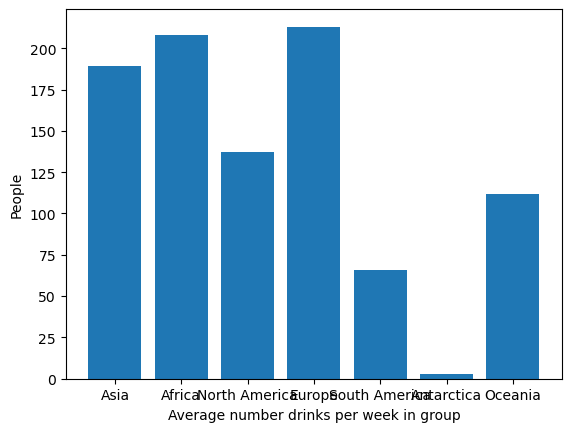

In [84]:
plt.bar(continent_labels, continent_count_in_order)
plt.xlabel("Average number drinks per week in group")
plt.ylabel("People")
plt.show()

### CAN IGNORE - was using this to go through unknowns -------------

In [75]:
# Manually re-classifying the unknowns by creating a dictionary
continent_mapping = {
    'Korea': 'Asia',
    'Western Sahara': 'Africa',
    'Slovakia (Slovak Republic)': 'Europe',
    'Saint Barthelemy': 'North America',
    'Pitcairn Islands': 'Oceania',
    'Holy See': 'Europe',
    'Reunion': 'Africa',
    'United States Minor Outlying Islands': 'North America',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'Saint Helena': 'Africa',
    "Cote d'Ivoire": 'Africa',
    'British Indian Ocean Territory (Chagos Archipelago)': 'Asia',
    'Palestinian Territory': 'Asia',
    'Libyan Arab Jamahiriya': 'Africa',
    'Timor-Leste': 'Asia',
    'Netherlands Antilles': 'North America'
}

# Applying the mapping to the dataframe
unknown_continent_rows['continent_of_birth'] = unknown_continent_rows['country_of_birth'].map(continent_mapping)

In [27]:
# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
unique_continent_counts

continent_of_birth
Asia             17
Africa           17
North America    10
Europe           10
Antarctica        8
Oceania           5
Name: count, dtype: int64

## END OF IGNORE

## Postcode - area

In [103]:
# Function to truncate postcode after the first numeric digit
def truncate_postcode(postcode):
    for i, char in enumerate(postcode):
        if char.isdigit():
            return postcode[:i]  # Truncate at the position of the first numeric digit
    return postcode  # Return the original postcode if no numeric digit is found

# Applying the function to create the postcode bands
data['postcode'] = data['postcode'].astype(str).apply(truncate_postcode)

# Print the updated DataFrame with the banded postcode column
print(data['postcode'])

# Find the number of unique postcodes and print
num_unique_postcodes = data['postcode'].nunique()
print("Number of unique postcodes:", num_unique_postcodes)

0      LS
1       M
2      SO
3       B
4      TQ
       ..
995    SA
996    TS
997     G
998    CT
999    SR
Name: postcode, Length: 1000, dtype: object
Number of unique postcodes: 124


In [104]:
postcode_values = pd.read_excel('PostcodeRegions.xlsx')
postcode_values.head(10)

# making it into a dictionary
postcode_dict = postcode_values.set_index('Postcode Area')['Region'].to_dict()

# Applying the mapping to the dataframe
data['Region'] = data['postcode'].map(postcode_dict)

data.head(10)

# Find the number of unique regions and print
unique_regions_counts = data['Region'].value_counts()
unique_regions_counts

Region
Greater London      248
North West          184
Scotland            125
East Midlands        91
West Midlands        85
South East           72
South West           54
East of England      47
North East           43
Wales                30
Channel Islands      11
Northern Ireland      6
East England          3
Isle of Man           1
Name: count, dtype: int64

## Weight - ranges

In [105]:
# Before banding, determining range of weight by finding minimum and maximum values
min_weight = data['weight'].min()
max_weight = data['weight'].max()

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 35.0
Maximum weight: 100.0


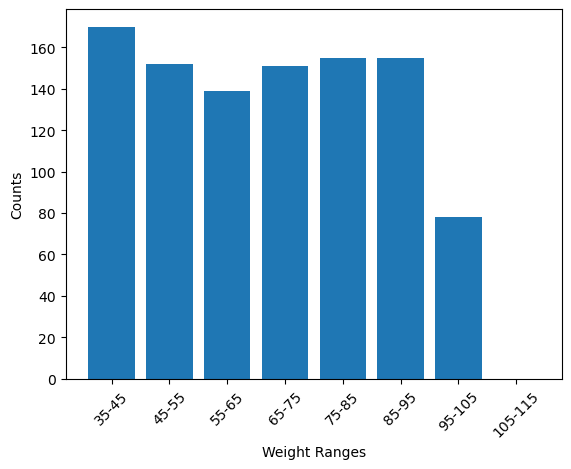

Number of unique weight ranges: 7


In [106]:
# Creating banding categories for weight with increments of 10 per category
weight_bins = [35, 45, 55, 65, 75, 85, 95, 105, 115]
weight_labels = ["35-45", "45-55", "55-65", "65-75", "75-85", "85-95", "95-105", "105-115"]  # Define labels for each bin
data["weight_ranges"] = pd.cut(data['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Obtaining counts of weight ranges
counts_weight = data["weight_ranges"].value_counts()
count_in_order_weight = [counts_weight[label] for label in weight_labels]  # Corrected variable name

# Plotting counts of weight ranges
plt.bar(weight_labels, count_in_order_weight)  # Corrected variable name
plt.xlabel("Weight Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding number of unique weight ranges
num_unique_weight_ranges = data['weight_ranges'].nunique()
print("Number of unique weight ranges:", num_unique_weight_ranges)

## Height - ranges

In [107]:
# Finding minimum and maximum heights
min_height = data['height'].min()
max_height = data['height'].max()

print(f"Minimum height: {min_height}")
print(f"Maximum height: {max_height}")

Minimum height: 1.4
Maximum height: 2.0


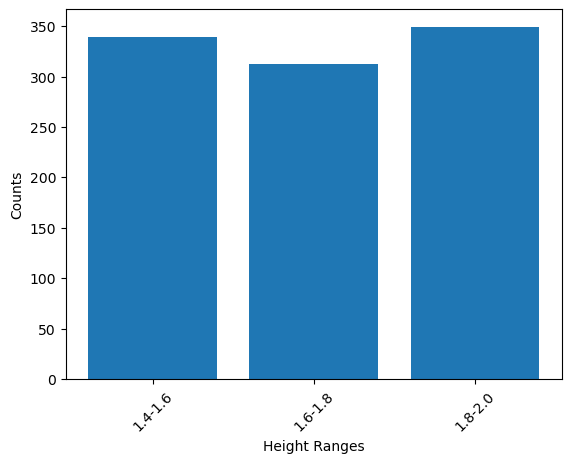

Number of unique height categories: 3


In [108]:
# Banding height into increments of 0.2
height_bins = [1.4, 1.6, 1.8, 2.1]  # Ranges for categories: 1.4-1.6, 1.6-1.8, 1.8-2.0 (adjust upper bound to include 2.0)
height_labels = ['1.4-1.6', '1.6-1.8', '1.8-2.0']  # Labels for the categories

# Banding heights into specified ranges
data['height_ranges'] = pd.cut(data['height'], bins=height_bins, labels=height_labels, right=False)

# Showing counts of height ranges
counts_height = data['height_ranges'].value_counts()
count_in_order_height = [counts_height[label] for label in height_labels]

# Plotting count of height ranges
plt.bar(height_labels, count_in_order_height)
plt.xlabel("Height Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding the number of unique height categories
num_unique_height_ranges = data['height_ranges'].nunique()
print("Number of unique height categories:", num_unique_height_ranges)

## Countries visited - bands

In [109]:
data.head(10)

,given_name,surname,gender,birthdate,country_of_birth,current_country,phone_number,postcode,national_insurance_number,bank_account_number,...,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited,birth_year,id,weight_ranges,height_ranges,continent_of_birth,Region
0,Lorraine,Reed,F,05/07/1984,Armenia,United Kingdom,(07700) 900876,LS,ZZ 19 48 92 T,51157818,...,6.5,218.8,phD,48,1984,sid_00001,65-75,1.6-1.8,Asia,North East
1,Edward,Williams,M,17/06/1997,Northern Mariana Islands,United Kingdom,(07700) 900 877,M,ZZ 753513 T,103328715,...,0.7,43.6,primary,42,1997,sid_00002,65-75,1.6-1.8,Oceania,North West
2,Hannah,Turner,F,15/06/1990,Venezuela,United Kingdom,+447700 900148,SO,ZZ 947196 T,69342327,...,7.8,59.1,bachelor,9,1990,sid_00003,95-105,1.8-2.0,South America,South East
3,Christine,Osborne,F,29/07/2000,Eritrea,United Kingdom,+447700 900112,B,ZZ 39 69 47 T,85159170,...,4.6,284.2,primary,32,2000,sid_00004,55-65,1.4-1.6,Africa,West Midlands
4,Francesca,Yates,F,04/11/1968,Ecuador,United Kingdom,07700 900 413,TQ,ZZ 30 98 91 T,11399166,...,4.4,348.8,secondary,34,1968,sid_00005,95-105,1.8-2.0,South America,South West
5,Joanne,Middleton,F,15/10/1963,Argentina,United Kingdom,+44(0)7700 900 032,CM,ZZ 141314 T,66208707,...,5.7,219.3,other,7,1963,sid_00006,35-45,1.4-1.6,South America,East of England
6,Joel,Spencer,M,08/07/1982,Cook Islands,United Kingdom,(07700) 900579,L,ZZ 97 20 76 T,108456420,...,2.4,79.5,secondary,34,1982,sid_00007,75-85,1.4-1.6,Oceania,North West
7,Leonard,Marshall,M,20/01/1987,Saint Vincent and the Grenadines,United Kingdom,07700 900508,CR,ZZ 599246 T,126109351,...,8.4,48.0,other,24,1987,sid_00008,55-65,1.8-2.0,North America,Greater London
8,Tracy,Smith,F,07/04/1999,Kiribati,United Kingdom,+447700 900 960,WR,ZZ278789T,10754702,...,1.2,148.1,secondary,17,1999,sid_00009,75-85,1.4-1.6,Oceania,West Midlands
9,Gavin,Kay,M,21/12/1998,Belize,United Kingdom,+44(0)7700900206,KT,ZZ 131934 T,52176102,...,5.2,47.0,bachelor,47,1998,sid_00010,75-85,1.6-1.8,North America,Greater London


# Dropping columns

In [110]:
# drop the 'gender' column
final_data = data.drop(columns=['given_name', 'surname', 'birthdate', 'country_of_birth', 'phone_number','postcode', 'national_insurance_number','bank_account_number','weight','height'])

In [111]:
final_data.head(10)

,gender,current_country,cc_status,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited,birth_year,id,weight_ranges,height_ranges,continent_of_birth,Region
0,F,United Kingdom,0,B+,6.5,218.8,phD,48,1984,sid_00001,65-75,1.6-1.8,Asia,North East
1,M,United Kingdom,0,O-,0.7,43.6,primary,42,1997,sid_00002,65-75,1.6-1.8,Oceania,North West
2,F,United Kingdom,0,B+,7.8,59.1,bachelor,9,1990,sid_00003,95-105,1.8-2.0,South America,South East
3,F,United Kingdom,0,O+,4.6,284.2,primary,32,2000,sid_00004,55-65,1.4-1.6,Africa,West Midlands
4,F,United Kingdom,0,A-,4.4,348.8,secondary,34,1968,sid_00005,95-105,1.8-2.0,South America,South West
5,F,United Kingdom,0,A-,5.7,219.3,other,7,1963,sid_00006,35-45,1.4-1.6,South America,East of England
6,M,United Kingdom,0,B+,2.4,79.5,secondary,34,1982,sid_00007,75-85,1.4-1.6,Oceania,North West
7,M,United Kingdom,0,A+,8.4,48.0,other,24,1987,sid_00008,55-65,1.8-2.0,North America,Greater London
8,F,United Kingdom,0,A+,1.2,148.1,secondary,17,1999,sid_00009,75-85,1.4-1.6,Oceania,West Midlands
9,M,United Kingdom,0,A+,5.2,47.0,bachelor,47,1998,sid_00010,75-85,1.6-1.8,North America,Greater London
